In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
path = os.getcwd()

def load_particles_bin(filename, n_particles):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=np.float64).reshape(n_particles, 7)
    return data

n_particles = int(1e5)
filename = path + "/particles/plummer_vel_3d_1e5_step100_var.bin"
particles = load_particles_bin(filename, n_particles)
x = particles[:, 1]
y = particles[:, 2]
z = particles[:, 3]
print("Loaded", n_particles, "particles.")

Loaded 100000 particles.


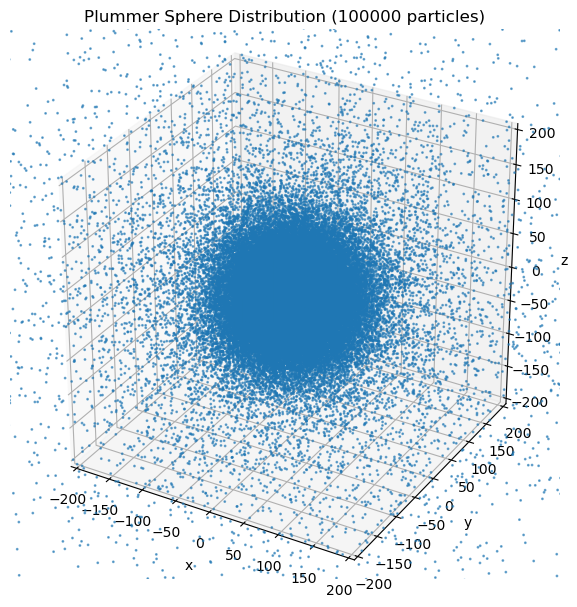

In [2]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, alpha=0.6)
ax.set_title("Plummer Sphere Distribution ({} particles)".format(n_particles))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect([1,1,1])
ax.set_xbound(-200, 200)
ax.set_ybound(-200, 200)
ax.set_zbound(-200, 200)
plt.tight_layout()

GIF 已儲存為 plummer_evolution.gif


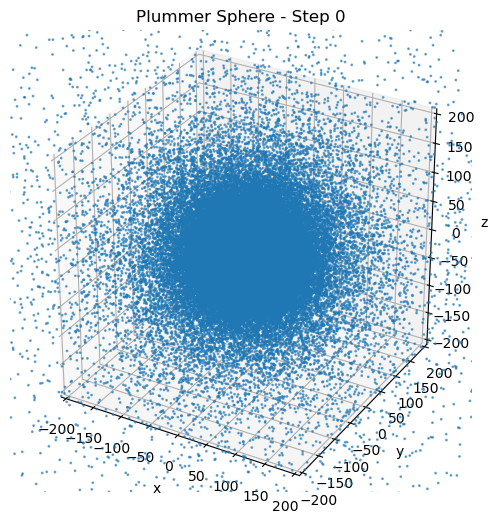

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import os

# 資料參數
n_particles = int(1e5)
n_steps = 101  # step0 到 step100
data_dir = os.getcwd() + "/particles"

# 載入某一時間步的資料
def load_particles(step):
    filename = f"{data_dir}/plummer_vel_3d_1e5_step{step}_var.bin"
    data = np.fromfile(filename, dtype=np.float64).reshape(n_particles, 7)
    return data[:, 1], data[:, 2], data[:, 3]

# 設定圖表
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter([], [], [], s=1, alpha=0.6)

ax.set_title("Plummer Sphere Evolution (v *= 0.9)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect([1, 1, 1])
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-200, 200)

# 更新函數，每一幀載入不同時間步資料
def update(frame):
    x, y, z = load_particles(frame)
    sc._offsets3d = (x, y, z)
    ax.set_title(f"Plummer Sphere - Step {frame}")
    return sc,

# 建立動畫
ani = FuncAnimation(fig, update, frames=n_steps, interval=100, blit=False)

# 儲存成 GIF
ani.save("plummer_evolution.gif", writer="pillow", fps=10)

print("GIF 已儲存為 plummer_evolution.gif")


# $\rho(r)$ vs $r$

GIF 已儲存為 density_profile_comparison.gif


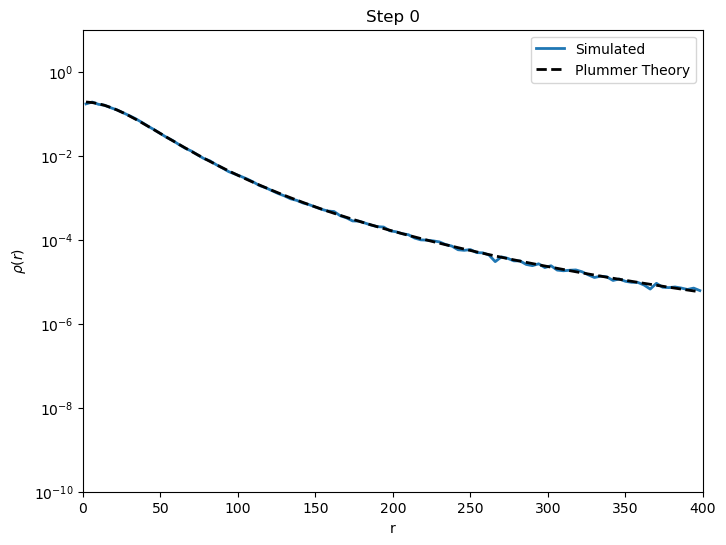

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

# 模型參數
n_particles = int(1e5)
n_steps = 101
data_dir = os.getcwd() + "/particles"
M = 1.0*int(1e5)  # 總質量（單位化）
a = 50.0  # Plummer 核心尺度
r_max = 400
n_bins = 100
bin_edges = np.linspace(0, r_max, n_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
shell_volumes = 4/3 * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)

# 理論密度函數
def plummer_density(r, M=M, a=a):
    return (3 * M) / (4 * np.pi * a**3) * (1 + (r/a)**2) ** (-2.5)

rho_theory = plummer_density(bin_centers)

# 載入粒子半徑
def load_radii(step):
    filename = f"{data_dir}/plummer_vel_3d_1e5_step{step}.bin"
    data = np.fromfile(filename, dtype=np.float64).reshape(n_particles, 7)
    x, y, z = data[:, 1], data[:, 2], data[:, 3]
    r = np.sqrt(x**2 + y**2 + z**2)
    return r

# 設定圖形
fig, ax = plt.subplots(figsize=(8, 6))
line_sim, = ax.plot([], [], label="Simulated", lw=2)
line_theory, = ax.plot(bin_centers, rho_theory, 'k--', label="Plummer Theory", lw=2)
ax.set_xlim(0, r_max)
ax.set_ylim(1e-10, 10)
ax.set_yscale("log")
ax.set_xlabel("r")
ax.set_ylabel(r"$\rho(r)$")
ax.set_title("Density Profile Comparison")
ax.legend()

# 更新函數
def update(frame):
    r = load_radii(frame)
    counts, _ = np.histogram(r, bins=bin_edges)
    rho_sim = counts / shell_volumes
    line_sim.set_data(bin_centers, rho_sim)
    ax.set_title(f"Step {frame}")
    return line_sim, line_theory

# 建立動畫
ani = FuncAnimation(fig, update, frames=n_steps, interval=100, blit=False)
ani.save("density_profile_comparison.gif", writer="pillow", fps=10)
print("GIF 已儲存為 density_profile_comparison.gif")
